In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
import pandas_profiling  

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA   

In [2]:
df = pd.read_csv("CC_GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


##### Creating necessary KPI's

In [6]:
df['Monthly_avg_purchase'] = df['PURCHASES']/df['TENURE']
df['Monthly_cash_advance'] = df['CASH_ADVANCE']/df['TENURE']
df['limit_usage'] = df['BALANCE']/df['CREDIT_LIMIT']

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429


In [8]:
def purchase_type(df):
     if ((df.ONEOFF_PURCHASES == 0 ) & (df.INSTALLMENTS_PURCHASES == 0)):
        return 'None'
     if ((df.ONEOFF_PURCHASES > 0 ) & (df.INSTALLMENTS_PURCHASES == 0)):
        return 'One_Of'
     if ((df.ONEOFF_PURCHASES == 0 ) & (df.INSTALLMENTS_PURCHASES > 0)):
        return 'Installment_Purchases'
     if ((df.ONEOFF_PURCHASES > 0 ) & (df.INSTALLMENTS_PURCHASES > 0)):
        return 'Both'

In [9]:
df['Purchase_type'] = df.apply(purchase_type, axis = 1)

In [10]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,Installment_Purchases
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,One_Of
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,One_Of
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,One_Of


##### Handling Outliers

In [11]:
df_new = pd.get_dummies(df, columns = ['Purchase_type'], drop_first = True, prefix = 'Purchase_type')

In [12]:
df_new.drop(columns = ['CUST_ID'], inplace = True, axis = 1)

In [13]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.95))
    x = x.clip(lower = x.quantile(0.05))
    return x

df_new = df_new.apply(outlier_capping)
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Purchase_type_Installment_Purchases,Purchase_type_None,Purchase_type_One_Of
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.457495,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,NaN,0.000000,12,124.916667,17.149001,0.222223,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,0,0,1


In [14]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

df_new=df_new.apply(lambda x: Missing_imputation(x))

In [15]:
df_new.count()

BALANCE                                8950
BALANCE_FREQUENCY                      8950
PURCHASES                              8950
ONEOFF_PURCHASES                       8950
INSTALLMENTS_PURCHASES                 8950
CASH_ADVANCE                           8950
PURCHASES_FREQUENCY                    8950
ONEOFF_PURCHASES_FREQUENCY             8950
PURCHASES_INSTALLMENTS_FREQUENCY       8950
CASH_ADVANCE_FREQUENCY                 8950
CASH_ADVANCE_TRX                       8950
PURCHASES_TRX                          8950
CREDIT_LIMIT                           8950
PAYMENTS                               8950
MINIMUM_PAYMENTS                       8950
PRC_FULL_PAYMENT                       8950
TENURE                                 8950
Monthly_avg_purchase                   8950
Monthly_cash_advance                   8950
limit_usage                            8950
Purchase_type_Installment_Purchases    8950
Purchase_type_None                     8950
Purchase_type_One_Of            

In [16]:
sc =  StandardScaler()

In [17]:
std_model = sc.fit(df_new)

In [18]:
std_model.transform(df_new)

array([[-0.83578259, -0.29790382, -0.66238867, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 1.03625747,  0.11829617, -0.74913553, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.61743705,  0.53449616, -0.04609497, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.846146  , -0.22853944, -0.61783315, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.85203237, -0.22853944, -0.74913553, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.63931145, -0.99157046,  0.24495256, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [19]:
df_scaled = pd.DataFrame(std_model.transform(df_new), columns = df_new.columns)

In [20]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1.585820e-16,1.000056,-0.854782,-0.784042,-0.342848,0.356305,2.638927
BALANCE_FREQUENCY,8950.0,-6.460754e-15,1.000056,-2.795108,0.025807,0.534496,0.534496,0.534496
PURCHASES,8950.0,5.124641e-15,1.000056,-0.749136,-0.713096,-0.420625,0.260301,2.886794
ONEOFF_PURCHASES,8950.0,1.072175e-14,1.000056,-0.600394,-0.600394,-0.549461,0.173513,2.979721
INSTALLMENTS_PURCHASES,8950.0,-4.120131e-15,1.000056,-0.675642,-0.675642,-0.496856,0.265771,2.839985
CASH_ADVANCE,8950.0,1.343209e-15,1.000056,-0.605707,-0.605707,-0.605707,0.219894,2.838929
PURCHASES_FREQUENCY,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,2.021052e-15,1.000056,-0.678661,-0.678661,-0.399319,0.326973,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,9.352668e-16,1.000056,-0.722502,-0.722502,-0.722502,0.535404,2.579503


In [21]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,Purchase_type_Installment_Purchases,Purchase_type_None,Purchase_type_One_Of
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.457495,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,312.343947,0.000000,12,124.916667,17.149001,0.222223,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,0,0,1


In [22]:
pca_model = PCA(n_components=23)

In [23]:
pca_model = pca_model.fit(df_scaled)

In [24]:
pca_model.explained_variance_

array([6.63425988e+00, 5.08638548e+00, 2.31843443e+00, 1.74850160e+00,
       1.17307684e+00, 1.14127982e+00, 8.87022470e-01, 7.22342410e-01,
       6.72540447e-01, 4.79716515e-01, 4.38579765e-01, 4.09331659e-01,
       3.18978375e-01, 2.09718503e-01, 2.01233249e-01, 1.70414135e-01,
       1.31041575e-01, 1.06651924e-01, 7.57599547e-02, 4.14664708e-02,
       2.53898191e-02, 7.03290021e-03, 3.41189991e-03])

In [25]:
pca_model.explained_variance_ratio_

array([2.88413853e-01, 2.21122485e-01, 1.00790234e-01, 7.60133146e-02,
       5.09976421e-02, 4.96153176e-02, 3.85618853e-02, 3.14026827e-02,
       2.92376219e-02, 2.08549094e-02, 1.90665549e-02, 1.77950402e-02,
       1.38670754e-02, 9.11717698e-03, 8.74829413e-03, 7.40848237e-03,
       5.69682320e-03, 4.63652205e-03, 3.29354304e-03, 1.80268860e-03,
       1.10378184e-03, 3.05744105e-04, 1.48326900e-04])

In [26]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.28841385, 0.50953634, 0.61032657, 0.68633989, 0.73733753,
       0.78695285, 0.82551473, 0.85691742, 0.88615504, 0.90700995,
       0.9260765 , 0.94387154, 0.95773862, 0.96685579, 0.97560409,
       0.98301257, 0.98870939, 0.99334592, 0.99663946, 0.99844215,
       0.99954593, 0.99985167, 1.        ])

In [27]:
pca_model = PCA(n_components = 6)

In [29]:
pca_model.fit(df_scaled)

PCA(n_components=6)

In [30]:
pca_model.explained_variance_

array([6.63425988, 5.08638548, 2.31843443, 1.7485016 , 1.17307683,
       1.14127981])

In [31]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.28841385, 0.50953634, 0.61032657, 0.68633989, 0.73733753,
       0.78695285])

In [32]:
PCs = pd.DataFrame(pca_model.transform(df_scaled), columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [33]:
PCs

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.846031,-2.905899,0.504972,-0.132558,-0.497045,0.183905
1,-3.474658,2.870245,0.245785,1.870491,-1.257588,-0.930186
2,1.163591,0.118101,-2.539361,-1.510564,-0.390988,1.502807
3,-0.077661,-0.550236,-2.805347,-0.209189,-1.038219,0.813315
4,-1.456794,-1.665943,-1.547597,-1.839670,0.009348,0.735008
...,...,...,...,...,...,...
8945,0.822427,-2.841290,1.897653,1.098460,2.241063,1.198588
8946,0.554392,-2.571324,1.925036,0.368984,2.240881,1.361849
8947,0.158849,-3.052936,1.490739,0.993281,2.021332,1.283153
8948,-2.286151,-2.220344,-0.626101,1.164460,2.361468,-1.275757


In [37]:
Loading = pd.DataFrame((pca_model.components_.T*np.sqrt(pca_model.explained_variance_)).T, columns = df_new.columns).T

In [38]:
Loading.columns = ['PC1','PC2','PC3','PC4','PC5','PC6']

In [39]:
Loading

,PC1,PC2,PC3,PC4,PC5,PC6
BALANCE,-0.192881,0.812304,0.122051,-0.269054,-0.221072,0.097727
BALANCE_FREQUENCY,0.116161,0.431330,0.200015,-0.474324,0.230672,-0.071757
PURCHASES,0.842816,0.413889,-0.154952,0.030304,0.059839,-0.111618
ONEOFF_PURCHASES,0.672034,0.417106,-0.471747,-0.007912,0.102541,-0.061433
INSTALLMENTS_PURCHASES,0.733180,0.218389,0.391477,0.067886,-0.002700,-0.129020
CASH_ADVANCE,-0.479329,0.706654,0.124214,0.370674,0.002234,0.133622
PURCHASES_FREQUENCY,0.831781,0.037967,0.331632,-0.016114,0.138997,0.239757
ONEOFF_PURCHASES_FREQUENCY,0.628204,0.330926,-0.483414,-0.055010,0.172743,0.060791
PURCHASES_INSTALLMENTS_FREQUENCY,0.705268,-0.008424,0.630346,0.025320,0.073537,0.069603
CASH_ADVANCE_FREQUENCY,-0.534348,0.641143,0.103947,0.204402,0.248734,0.051407


In [40]:
Loading.to_csv('loadings1.csv')

In [41]:
selected_vars =['Purchase_type_One_Of',
'CASH_ADVANCE',
'BALANCE',
'limit_usage',
'PURCHASES_TRX',
'PURCHASES',
'TENURE',
'Purchase_type_None'
]

In [42]:
final_input_segmentation = df_scaled[selected_vars]

In [43]:
final_input_segmentation

,Purchase_type_One_Of,CASH_ADVANCE,BALANCE,limit_usage,PURCHASES_TRX,PURCHASES,TENURE,Purchase_type_None
0,-0.514625,-0.605707,-0.835783,-0.990006,-0.680426,-0.662389,0.378995,-0.543690
1,-0.514625,2.838929,1.036257,0.212144,-0.807798,-0.749136,0.378995,1.839282
2,1.943162,-0.605707,0.617437,-0.148012,-0.043563,-0.046095,0.378995,-0.543690
3,1.943162,-0.453170,0.126875,-0.466773,-0.744112,0.613899,0.378995,-0.543690
4,1.943162,-0.605707,-0.375812,0.858340,-0.744112,-0.734587,0.378995,-0.543690
...,...,...,...,...,...,...,...,...
8945,-0.514625,-0.605707,-0.843129,-1.025809,-0.425681,-0.484421,-3.266360,-0.543690
8946,-0.514625,-0.605707,-0.848642,-1.052676,-0.425681,-0.476347,-3.266360,-0.543690
8947,-0.514625,-0.605707,-0.846146,-1.040511,-0.489367,-0.617833,-3.266360,-0.543690
8948,-0.514625,-0.578608,-0.852032,-1.030364,-0.807798,-0.749136,-3.266360,1.839282


In [44]:
final_input_segmentation1 = PCs  

In [45]:
final_input_segmentation

,Purchase_type_One_Of,CASH_ADVANCE,BALANCE,limit_usage,PURCHASES_TRX,PURCHASES,TENURE,Purchase_type_None
0,-0.514625,-0.605707,-0.835783,-0.990006,-0.680426,-0.662389,0.378995,-0.543690
1,-0.514625,2.838929,1.036257,0.212144,-0.807798,-0.749136,0.378995,1.839282
2,1.943162,-0.605707,0.617437,-0.148012,-0.043563,-0.046095,0.378995,-0.543690
3,1.943162,-0.453170,0.126875,-0.466773,-0.744112,0.613899,0.378995,-0.543690
4,1.943162,-0.605707,-0.375812,0.858340,-0.744112,-0.734587,0.378995,-0.543690
...,...,...,...,...,...,...,...,...
8945,-0.514625,-0.605707,-0.843129,-1.025809,-0.425681,-0.484421,-3.266360,-0.543690
8946,-0.514625,-0.605707,-0.848642,-1.052676,-0.425681,-0.476347,-3.266360,-0.543690
8947,-0.514625,-0.605707,-0.846146,-1.040511,-0.489367,-0.617833,-3.266360,-0.543690
8948,-0.514625,-0.578608,-0.852032,-1.030364,-0.807798,-0.749136,-3.266360,1.839282


In [46]:
km_3 = KMeans(n_clusters = 3, random_state = 123)
km_3 = km_3.fit(final_input_segmentation)

In [47]:
km_3.cluster_centers_

array([[ 0.29713072, -0.43598943, -0.46345011, -0.32178272, -0.19788472,
        -0.22117663, -0.01100967, -0.5431942 ],
       [-0.35590291, -0.1720903 ,  0.39503076, -0.01643288,  1.78647279,
         1.78216395,  0.28803915, -0.54369045],
       [-0.33698759,  0.90150504,  0.61946664,  0.60053241, -0.68390837,
        -0.63861076, -0.14864076,  1.31621263]])

In [48]:
km_3.labels_

array([0, 2, 0, ..., 0, 2, 0])

In [50]:
km_4 = KMeans(n_clusters = 4, random_state = 123)
km_5 = KMeans(n_clusters = 5, random_state = 123)
km_6 = KMeans(n_clusters = 6, random_state = 123)
km_7 = KMeans(n_clusters = 7, random_state = 123)
km_8 = KMeans(n_clusters = 8, random_state = 123)


In [51]:
km_4= km_4.fit(final_input_segmentation)
km_5= km_5.fit(final_input_segmentation)
km_6= km_6.fit(final_input_segmentation)
km_7= km_7.fit(final_input_segmentation)
km_8= km_8.fit(final_input_segmentation)

In [52]:
df_new['cluster_3']= km_3.labels_
df_new['cluster_4']= km_4.labels_
df_new['cluster_5']= km_5.labels_
df_new['cluster_6']= km_6.labels_
df_new['cluster_7']= km_7.labels_
df_new['cluster_8']= km_8.labels_


In [54]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,limit_usage,Purchase_type_Installment_Purchases,Purchase_type_None,Purchase_type_One_Of,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1,0,0,0,3,1,3,0,5
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.457495,0,1,0,2,2,2,0,3,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0,0,1,0,0,0,4,2,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0,0,1,0,0,0,4,2,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,0,0,1,0,0,0,4,2,2


In [91]:
silhouette_score(final_input_segmentation, km_6.labels_)

0.3525512000814292

In [60]:
k_range = range(3,8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state = 123)
    km.fit(final_input_segmentation)
    scores.append(silhouette_score(final_input_segmentation, km.labels_))

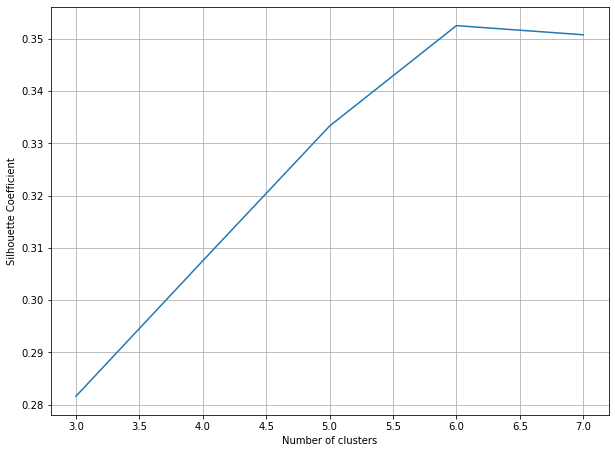

In [62]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [63]:
scores

[0.2816114462805142,
 0.30753611063375946,
 0.3333344283313518,
 0.3525512000814292,
 0.3508012397923954]

In [64]:
df_new.cluster_6.value_counts()/sum(df_new.cluster_6.value_counts())

3    0.351173
5    0.166592
4    0.163687
1    0.135307
0    0.103575
2    0.079665
Name: cluster_6, dtype: float64

In [65]:
df_new.cluster_3.value_counts()/sum(df_new.cluster_3.value_counts())

0    0.536872
2    0.292626
1    0.170503
Name: cluster_3, dtype: float64

In [66]:
df_new.cluster_4.value_counts()/sum(df_new.cluster_4.value_counts())

3    0.385363
2    0.261564
0    0.201788
1    0.151285
Name: cluster_4, dtype: float64

In [67]:
df_new.cluster_5.value_counts()/sum(df_new.cluster_5.value_counts())

1    0.355419
2    0.231844
0    0.182905
3    0.143464
4    0.086369
Name: cluster_5, dtype: float64

In [68]:
df_new.cluster_7.value_counts()/sum(df_new.cluster_7.value_counts())

0    0.262458
2    0.164581
5    0.163911
4    0.124693
1    0.113631
3    0.091508
6    0.079218
Name: cluster_7, dtype: float64

In [69]:
df_new.cluster_8.value_counts()/sum(df_new.cluster_8.value_counts())

5    0.262346
2    0.160782
1    0.144134
0    0.122682
4    0.110838
7    0.077654
6    0.061341
3    0.060223
Name: cluster_8, dtype: float64

In [70]:
size = pd.concat([pd.Series(df_new.cluster_3.size), pd.Series.sort_index(df_new.cluster_3.value_counts()),pd.Series.sort_index(df_new.cluster_4.value_counts()),pd.Series.sort_index(df_new.cluster_5.value_counts()),pd.Series.sort_index(df_new.cluster_6.value_counts()),pd.Series.sort_index(df_new.cluster_7.value_counts()),pd.Series.sort_index(df_new.cluster_8.value_counts())])

In [71]:
size

0    8950
0    4805
1    1526
2    2619
0    1806
1    1354
2    2341
3    3449
0    1637
1    3181
2    2075
3    1284
4     773
0     927
1    1211
2     713
3    3143
4    1465
5    1491
0    2349
1    1017
2    1473
3     819
4    1116
5    1467
6     709
0    1098
1    1290
2    1439
3     539
4     992
5    2348
6     549
7     695
dtype: int64

In [72]:
Seg_size = pd.DataFrame(size, columns = ['Seg_size'])
Seg_Pct = pd.DataFrame(size/df_new.cluster_6.size, columns = ['Seg_Pct'])

In [73]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.536872,0.170503,0.292626,0.201788,0.151285,0.261564,0.385363,0.182905,0.355419,...,0.163911,0.079218,0.122682,0.144134,0.160782,0.060223,0.110838,0.262346,0.061341,0.077654


In [74]:
pd.concat([Seg_size.T,Seg_Pct.T],axis = 0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,4805.000000,1526.000000,2619.000000,1806.000000,1354.000000,2341.000000,3449.000000,1637.000000,3181.000000,...,1467.000000,709.000000,1098.000000,1290.000000,1439.000000,539.000000,992.000000,2348.000000,549.000000,695.000000
Seg_Pct,1.0,0.536872,0.170503,0.292626,0.201788,0.151285,0.261564,0.385363,0.182905,0.355419,...,0.163911,0.079218,0.122682,0.144134,0.160782,0.060223,0.110838,0.262346,0.061341,0.077654


In [75]:
df_new.apply(np.mean).T

BALANCE                                1452.399593
BALANCE_FREQUENCY                         0.883252
PURCHASES                               823.863022
ONEOFF_PURCHASES                        447.948730
INSTALLMENTS_PURCHASES                  336.336040
CASH_ADVANCE                            817.161146
PURCHASES_FREQUENCY                       0.490351
ONEOFF_PURCHASES_FREQUENCY                0.202458
PURCHASES_INSTALLMENTS_FREQUENCY          0.364437
CASH_ADVANCE_FREQUENCY                    0.127637
CASH_ADVANCE_TRX                          2.731732
PURCHASES_TRX                            12.684022
CREDIT_LIMIT                           4366.500350
PAYMENTS                               1479.577413
MINIMUM_PAYMENTS                        631.810232
PRC_FULL_PAYMENT                          0.153715
TENURE                                   11.584134
Monthly_avg_purchase                     71.030929
Monthly_cash_advance                     73.636578
limit_usage                    

In [76]:
df_new.groupby('cluster_6').apply(np.mean).T

cluster_6,0,1,2,3,4,5
BALANCE,4623.507362,2127.473246,764.756785,597.225105,979.850317,1528.359574
BALANCE_FREQUENCY,0.979575,0.983330,0.790348,0.857675,0.830661,0.892098
PURCHASES,501.400159,3032.047063,414.756534,664.307617,582.475670,0.000000
ONEOFF_PURCHASES,273.973890,1696.573805,231.818648,223.303743,568.932490,0.000000
INSTALLMENTS_PURCHASES,216.671561,1097.739178,171.862496,431.897206,0.000000,0.000000
CASH_ADVANCE,3531.635473,477.979260,981.827875,149.470657,365.744989,1177.255083
PURCHASES_FREQUENCY,0.350660,0.940321,0.432457,0.688679,0.308297,0.000224
ONEOFF_PURCHASES_FREQUENCY,0.131426,0.611992,0.123386,0.130395,0.308012,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.246712,0.775885,0.295072,0.599012,0.000000,0.000224
CASH_ADVANCE_FREQUENCY,0.376237,0.076152,0.177957,0.038863,0.081165,0.223628


In [78]:
Profiling_output = pd.concat([df_new.apply(lambda x : x.mean()).T, df_new.groupby('cluster_3').apply(lambda x : x.mean()).T,df_new.groupby('cluster_4').apply(lambda x : x.mean()).T,df_new.groupby('cluster_5').apply(lambda x : x.mean()).T,df_new.groupby('cluster_6').apply(lambda x : x.mean()).T,df_new.groupby('cluster_7').apply(lambda x : x.mean()).T,df_new.groupby('cluster_8').apply(lambda x : x.mean()).T], axis = 1)

In [79]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1452.399593,669.478794,2113.992947,2503.313293,1328.153843,2325.224618,2304.000217,596.785120,1362.645614,616.933947,...,1526.298075,753.067458,2066.105923,1319.973634,951.726645,4105.502799,1950.939835,253.393838,4413.410613,707.858909
BALANCE_FREQUENCY,0.883252,0.838916,0.980177,0.908120,0.838756,0.983065,0.899445,0.856377,0.846937,0.859032,...,0.892644,0.789513,0.981766,0.887378,0.829187,0.952464,0.992320,0.812579,0.976232,0.787857
PURCHASES,823.863022,581.575737,2789.725791,122.940462,593.801398,2893.616743,67.963050,644.856524,584.427114,668.825740,...,0.000000,415.966712,3151.961107,0.000000,583.077822,0.000000,686.610413,690.609199,883.794124,411.224258
ONEOFF_PURCHASES,447.948730,307.164991,1544.481594,67.328919,578.013110,1603.970939,23.056929,214.408969,570.015250,224.658854,...,0.000000,233.126511,1774.681144,0.000000,568.565284,0.000000,264.719950,225.440449,529.795803,229.613715
INSTALLMENTS_PURCHASES,336.336040,268.192835,1032.739920,55.586053,0.000000,1070.894913,44.925971,421.874210,0.000000,434.639010,...,0.000000,171.768618,1126.364913,0.000000,0.000000,0.000000,414.406628,453.651305,323.309918,172.226043
CASH_ADVANCE,817.161146,228.865987,582.101375,2033.449594,742.723403,671.540613,1886.580275,187.440816,719.467366,174.786170,...,1120.729625,957.007217,449.025003,911.316594,317.890078,3547.409572,425.810618,85.494151,3701.562460,892.323199
PURCHASES_FREQUENCY,0.490351,0.560188,0.923362,0.109921,0.304456,0.931888,0.076564,0.695209,0.304771,0.689192,...,0.000227,0.432280,0.942176,0.000258,0.309849,0.000000,0.691092,0.695885,0.520170,0.435752
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.177072,0.565067,0.037752,0.304225,0.582663,0.014533,0.127462,0.304517,0.131980,...,0.000000,0.124082,0.631597,0.000000,0.309559,0.000000,0.153702,0.130648,0.231287,0.124943
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.398380,0.753926,0.075223,0.000000,0.770206,0.063408,0.600295,0.000000,0.598599,...,0.000227,0.294417,0.777397,0.000258,0.000000,0.000000,0.593386,0.607054,0.341328,0.296990
CASH_ADVANCE_FREQUENCY,0.127637,0.055208,0.089239,0.282895,0.120554,0.097186,0.272752,0.044805,0.114679,0.041047,...,0.221729,0.175592,0.070914,0.209295,0.077409,0.365049,0.107240,0.020222,0.389873,0.170424


In [85]:
Profiling_output_final = pd.concat([Seg_size.T, Seg_Pct.T,Profiling_output], axis = 0)

In [86]:
Profiling_output_final 

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,4805.000000,1526.000000,2619.000000,1806.000000,1354.000000,2341.000000,3449.000000,1637.000000,3181.000000,...,1467.000000,709.000000,1098.000000,1290.000000,1439.000000,539.000000,992.000000,2348.000000,549.000000,695.000000
Seg_Pct,1.000000,0.536872,0.170503,0.292626,0.201788,0.151285,0.261564,0.385363,0.182905,0.355419,...,0.163911,0.079218,0.122682,0.144134,0.160782,0.060223,0.110838,0.262346,0.061341,0.077654
Seg_size,8950.000000,4805.000000,1526.000000,2619.000000,1806.000000,1354.000000,2341.000000,3449.000000,1637.000000,3181.000000,...,1467.000000,709.000000,1098.000000,1290.000000,1439.000000,539.000000,992.000000,2348.000000,549.000000,695.000000
Seg_Pct,1.000000,0.536872,0.170503,0.292626,0.201788,0.151285,0.261564,0.385363,0.182905,0.355419,...,0.163911,0.079218,0.122682,0.144134,0.160782,0.060223,0.110838,0.262346,0.061341,0.077654
BALANCE,1452.399593,669.478794,2113.992947,2503.313293,1328.153843,2325.224618,2304.000217,596.785120,1362.645614,616.933947,...,1526.298075,753.067458,2066.105923,1319.973634,951.726645,4105.502799,1950.939835,253.393838,4413.410613,707.858909
BALANCE_FREQUENCY,0.883252,0.838916,0.980177,0.908120,0.838756,0.983065,0.899445,0.856377,0.846937,0.859032,...,0.892644,0.789513,0.981766,0.887378,0.829187,0.952464,0.992320,0.812579,0.976232,0.787857
PURCHASES,823.863022,581.575737,2789.725791,122.940462,593.801398,2893.616743,67.963050,644.856524,584.427114,668.825740,...,0.000000,415.966712,3151.961107,0.000000,583.077822,0.000000,686.610413,690.609199,883.794124,411.224258
ONEOFF_PURCHASES,447.948730,307.164991,1544.481594,67.328919,578.013110,1603.970939,23.056929,214.408969,570.015250,224.658854,...,0.000000,233.126511,1774.681144,0.000000,568.565284,0.000000,264.719950,225.440449,529.795803,229.613715
INSTALLMENTS_PURCHASES,336.336040,268.192835,1032.739920,55.586053,0.000000,1070.894913,44.925971,421.874210,0.000000,434.639010,...,0.000000,171.768618,1126.364913,0.000000,0.000000,0.000000,414.406628,453.651305,323.309918,172.226043
CASH_ADVANCE,817.161146,228.865987,582.101375,2033.449594,742.723403,671.540613,1886.580275,187.440816,719.467366,174.786170,...,1120.729625,957.007217,449.025003,911.316594,317.890078,3547.409572,425.810618,85.494151,3701.562460,892.323199


In [87]:
Profiling_output_final.columns = ['Overall','KM3_1','KM3_2','KM3_3',
                                 'KM4_1','KM4_2','KM4_3','KM4_4',
                                 'KM5_1','KM5_2','KM5_3','KM5_4','KM5_5',
                                 'KM6_1','KM6_6','KM6_3','KM6_4','KM6_5','KM6_6',
                                 'KM7_1','KM7_2','KM7_3','KM7_4','KM7_5','KM7_6', 'KM7_7',
                                 'KM8_1','KM8_2','KM8_3','KM8_4','KM8_5','KM8_6','KM8_7','KM8_8']

In [88]:
Profiling_output_final 

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,4805.000000,1526.000000,2619.000000,1806.000000,1354.000000,2341.000000,3449.000000,1637.000000,3181.000000,...,1467.000000,709.000000,1098.000000,1290.000000,1439.000000,539.000000,992.000000,2348.000000,549.000000,695.000000
Seg_Pct,1.000000,0.536872,0.170503,0.292626,0.201788,0.151285,0.261564,0.385363,0.182905,0.355419,...,0.163911,0.079218,0.122682,0.144134,0.160782,0.060223,0.110838,0.262346,0.061341,0.077654
Seg_size,8950.000000,4805.000000,1526.000000,2619.000000,1806.000000,1354.000000,2341.000000,3449.000000,1637.000000,3181.000000,...,1467.000000,709.000000,1098.000000,1290.000000,1439.000000,539.000000,992.000000,2348.000000,549.000000,695.000000
Seg_Pct,1.000000,0.536872,0.170503,0.292626,0.201788,0.151285,0.261564,0.385363,0.182905,0.355419,...,0.163911,0.079218,0.122682,0.144134,0.160782,0.060223,0.110838,0.262346,0.061341,0.077654
BALANCE,1452.399593,669.478794,2113.992947,2503.313293,1328.153843,2325.224618,2304.000217,596.785120,1362.645614,616.933947,...,1526.298075,753.067458,2066.105923,1319.973634,951.726645,4105.502799,1950.939835,253.393838,4413.410613,707.858909
BALANCE_FREQUENCY,0.883252,0.838916,0.980177,0.908120,0.838756,0.983065,0.899445,0.856377,0.846937,0.859032,...,0.892644,0.789513,0.981766,0.887378,0.829187,0.952464,0.992320,0.812579,0.976232,0.787857
PURCHASES,823.863022,581.575737,2789.725791,122.940462,593.801398,2893.616743,67.963050,644.856524,584.427114,668.825740,...,0.000000,415.966712,3151.961107,0.000000,583.077822,0.000000,686.610413,690.609199,883.794124,411.224258
ONEOFF_PURCHASES,447.948730,307.164991,1544.481594,67.328919,578.013110,1603.970939,23.056929,214.408969,570.015250,224.658854,...,0.000000,233.126511,1774.681144,0.000000,568.565284,0.000000,264.719950,225.440449,529.795803,229.613715
INSTALLMENTS_PURCHASES,336.336040,268.192835,1032.739920,55.586053,0.000000,1070.894913,44.925971,421.874210,0.000000,434.639010,...,0.000000,171.768618,1126.364913,0.000000,0.000000,0.000000,414.406628,453.651305,323.309918,172.226043
CASH_ADVANCE,817.161146,228.865987,582.101375,2033.449594,742.723403,671.540613,1886.580275,187.440816,719.467366,174.786170,...,1120.729625,957.007217,449.025003,911.316594,317.890078,3547.409572,425.810618,85.494151,3701.562460,892.323199


In [90]:
Profiling_output_final.to_csv('Profiling_output_final.csv')

In [92]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,limit_usage,Purchase_type_Installment_Purchases,Purchase_type_None,Purchase_type_One_Of,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1,0,0,0,3,1,3,0,5
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.457495,0,1,0,2,2,2,0,3,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0,0,1,0,0,0,4,2,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0,0,1,0,0,0,4,2,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,0,0,1,0,0,0,4,2,2


In [94]:
df_new[df_new.cluster_6 ==0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,limit_usage,Purchase_type_Installment_Purchases,Purchase_type_None,Purchase_type_One_Of,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
1,3202.467416,0.909091,0.0000,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.457495,0,1,0,2,2,2,0,3,3
15,5909.111808,1.000000,1611.7000,0.000,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,...,0.860777,1,0,0,2,2,2,0,3,6
23,3800.151377,0.818182,3998.6195,2671.094,793.79,4647.169122,1.000000,0.083333,0.916667,0.333333,...,0.422239,0,0,0,1,1,3,0,3,6
28,5909.111808,1.000000,387.0500,204.550,182.50,2236.145259,0.666667,0.166667,0.416667,0.583333,...,0.681225,0,0,0,2,2,2,0,3,6
32,5909.111808,1.000000,324.9500,324.950,0.00,1189.533753,0.083333,0.083333,0.000000,0.166667,...,0.641221,0,0,1,2,0,0,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,1478.089943,0.800000,245.0100,245.010,0.00,4377.526126,0.100000,0.100000,0.000000,0.583333,...,0.591236,0,0,1,2,0,0,0,3,6
8813,3335.053583,0.700000,0.0000,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.300000,...,0.476436,0,1,0,2,2,2,0,3,3
8839,3271.424058,0.888889,1173.2800,0.000,1173.28,4122.912645,0.888889,0.000000,0.777778,0.333333,...,0.654285,1,0,0,2,2,4,0,3,6
8840,2588.410789,0.888889,787.4000,0.000,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,...,0.862804,1,0,0,2,2,4,0,3,6


In [95]:
km_6

KMeans(n_clusters=6, random_state=123)

In [97]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df_scaled )
    cluster_errors.append( clusters.inertia_ )

In [98]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,205850.000000
1,2,165594.742242
2,3,135318.169466
3,4,120351.164125
4,5,109134.650479
5,6,102563.094907
6,7,97727.010838
7,8,94231.120576
8,9,90133.726513
9,10,87343.372630


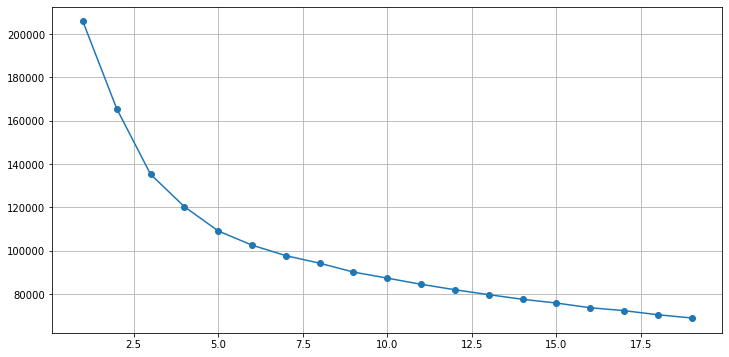

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 5 to 6. So, optimal number of clusters could either 5 or 6. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.